<a href="https://colab.research.google.com/github/gmauricio-toledo/MetodosNumericos/blob/main/Tarea6_SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Tarea 7</h1>**

<h3>Solución</h3>

In [5]:
import numpy as np

Método de Runge-Kutta de orden 2, como función:

In [4]:
def runge_kutta_orden2(f,a,b,y0,h,a2=0.5):
    # Calculamos los parámetros del método: ----
    a1 = 1-a2
    if a2!=0:
        p = 1/(2*a2)
    else:
        p = 1
    q = p
    # Inicializamos los arreglos: -------------
    n = int((b-a)/h)
    xs = np.linspace(a,b,n+1)  # variables independientes
    ys = np.zeros_like(xs)
    ys[0] = y0
    # Resolvemos numéricamente: ---------------
    for j in range(1,n+1):
        k1 = f(xs[j-1],ys[j-1])
        k2 = f(xs[j-1]+p*h,ys[j-1]+q*k1*h)
        ys[j] = ys[j-1] + (a1*k1 + a2*k2)*h 
    return xs, ys

Método de Runge-Kutta de orden 4, como función:

In [3]:
def runge_kutta_orden4(f,a,b,y0,h):
    # Inicializamos los arreglos: -------------
    n = int((b-a)/h)
    xs = np.linspace(a,b,n+1)  # variables independientes
    ys = np.zeros_like(xs)
    ys[0] = y0
    # Resolvemos numéricamente: ---------------
    for j in range(1,n+1):
        k1 = f(xs[j-1],ys[j-1])
        k2 = f(xs[j-1]+0.5*h,ys[j-1]+0.5*k1*h)
        k3 = f(xs[j-1]+0.5*h,ys[j-1] + 0.5*k2*h)
        k4 = f(xs[j-1]+h,ys[j-1] + k3*h)
        ys[j] = ys[j-1] + (1/6)*(k1 + 2*k2+2*k3+k4)*h
    return xs, ys

Definimos algunas funciones auxiliares:

In [10]:
import matplotlib.pyplot as plt

def grafica(X,Y,sol,title=''):
    plt.figure()
    plt.suptitle(title)
    plt.plot(X,Y,label='aproximación')
    plt.plot(X,sol(X),label='solución real')
    plt.legend()
    plt.show()

def tabla():
    pass

# Ejercicio 1

La función es:

In [6]:
def f(x,y):
    return 10*np.exp(-88.8888*(x-2)**2)-0.6*y

a, b = 0, 4
h = 0.25
y0 = 0.5

La solución real de la EDO es

In [7]:
from scipy.stats import norm

def solucion_real(x):
    return np.exp(-0.6*x)*(3.62402 - 3.12402*norm.cdf(18.888 - 9.42809*x))

**(a)**

In [8]:
xs_2, ys_2 = runge_kutta_orden2(f,a,b,y0,h,a2=0.4)
xs_4, ys_4 = runge_kutta_orden4(f,a,b,y0,h)

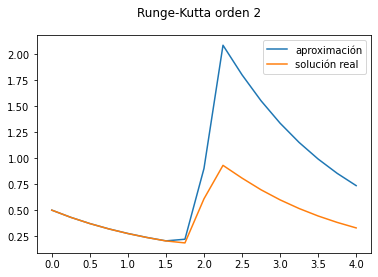

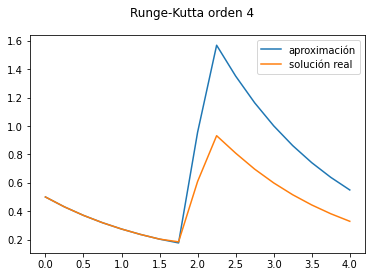

In [13]:
grafica(xs_2,ys_2,solucion_real,title='Runge-Kutta orden 2')
grafica(xs_4,ys_4,solucion_real,title='Runge-Kutta orden 4')

**(b)**

La intención de este ejemplo es mostrar que hay ejemplos donde, incluso, Runge-Kutta de orden 4 tiene problemas para encontrar una buena solución

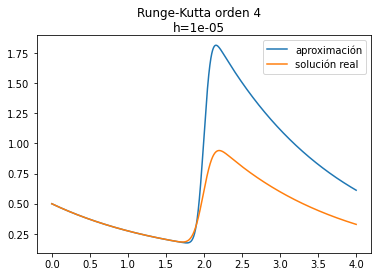

In [23]:
h = 1e-5
xs_4, ys_4 = runge_kutta_orden4(f,a,b,y0,h)
grafica(xs_4,ys_4,solucion_real,title=f'Runge-Kutta orden 4\nh={h}')

**(C)** La solución no es la mejor, pero en este orden de aproximación, ambos métodos dan una solución muy similar con el mismo tamaño de paso.

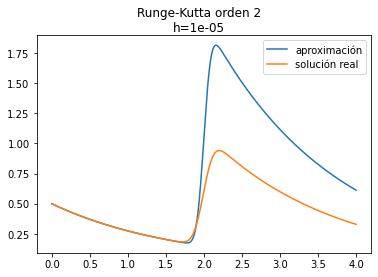

In [24]:
h = 1e-5
xs_2, ys_2 = runge_kutta_orden2(f,a,b,y0,h)
grafica(xs_2,ys_2,solucion_real,title=f'Runge-Kutta orden 2\nh={h}')

# Ejercicio 2

In [26]:
from numpy import sin

def f(x,y):
    return y*sin(x)

a, b = 0, 5
y0 = 1

solucion_real = lambda x: np.exp(1-np.cos(x))

**(a)** Basta con tomar un tamaño de paso del orden de $10^{-1}$ para tener una solución casi exacta.

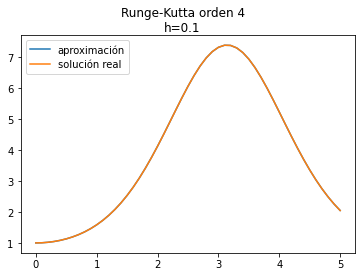

In [33]:
h = 0.1
xs_4, ys_4 = runge_kutta_orden4(f,a,b,y0,h)
grafica(xs_4,ys_4,solucion_real,title=f'Runge-Kutta orden 4\nh={h}')

**(b)** Necesitamos un tamaño de paso del orden de $10^{-2}$ con el método de Euler.

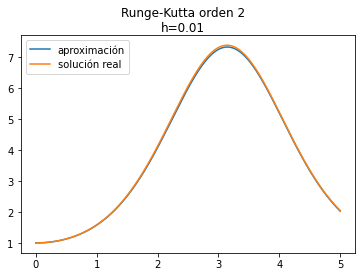

In [36]:
h = 0.01
xs_4, ys_4 = runge_kutta_orden2(f,a,b,y0,h,a2=0)
grafica(xs_4,ys_4,solucion_real,title=f'Runge-Kutta orden 2\nh={h}')